In [1]:
from clean2 import *
from analyze import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_turnstiles, df_ampm = data_wrangling()

In [3]:
df_ampm

,C/A,UNIT,SCP,STATION,DATE,AMPM,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,TMP_ENTRIES,TMP_EXITS
1,A002,R051,02-00-00,59 ST,11/02/2019,PM,Saturday,7256982,2458965,11/02/2019,7256298.0,2458759.0,684.0,206.0
2,A002,R051,02-00-00,59 ST,11/03/2019,AM,Sunday,7257271,2459060,11/02/2019,7256982.0,2458965.0,289.0,95.0
3,A002,R051,02-00-00,59 ST,11/03/2019,PM,Sunday,7258068,2459211,11/03/2019,7257271.0,2459060.0,797.0,151.0
4,A002,R051,02-00-00,59 ST,11/04/2019,AM,Monday,7258268,2459570,11/03/2019,7258068.0,2459211.0,200.0,359.0
5,A002,R051,02-00-00,59 ST,11/04/2019,PM,Monday,7259609,2459759,11/04/2019,7258268.0,2459570.0,1341.0,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547681,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/25/2019,PM,Wednesday,5554,420,12/25/2019,5554.0,420.0,0.0,0.0
547682,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/26/2019,AM,Thursday,5554,420,12/25/2019,5554.0,420.0,0.0,0.0
547683,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/26/2019,PM,Thursday,5554,420,12/26/2019,5554.0,420.0,0.0,0.0
547684,TRAM2,R469,00-05-01,RIT-ROOSEVELT,12/27/2019,AM,Friday,5554,420,12/26/2019,5554.0,420.0,0.0,0.0


In [4]:
# def calculate_total_daily_traffic(df_ampm):
    
#     """
#     Function to group df_ampm by station, date, and day name and 
#     sum up daily entries and exits to generate total daily traffic data.
#     Therefore, the total daily traffic data sums am and pm traffic
    
#     """
    
#     # sum daily entries for the group
#     df_daily = df_ampm.groupby(["STATION", "DATE", 'DAY_NAME'], as_index=False).TMP_ENTRIES.sum()
#     df_daily.rename(columns={"TMP_ENTRIES": "DAILY_ENTRIES"}, inplace=True)
#     # sum daily exits for the group
#     t = df_ampm.groupby(["STATION", "DATE", 'DAY_NAME'], as_index=False).TMP_EXITS.sum()
#     df_daily['DAILY_EXITS'] = t.TMP_EXITS
#     # sum daily entries and exits to obtain daily traffic
#     df_daily["DAILY_TRAFFIC"] = df_daily.DAILY_ENTRIES + df_daily.DAILY_EXITS
    
#     return df_daily

df_daily = calculate_total_daily_traffic(df_ampm)

df_daily[df_daily["STATION"] == "34 ST-PENN STA"].head()

,STATION,DATE,DAY_NAME,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
3415,34 ST-PENN STA,11/02/2019,Saturday,70975.0,72454.0,143429.0
3416,34 ST-PENN STA,11/03/2019,Sunday,100460.0,96216.0,196676.0
3417,34 ST-PENN STA,11/04/2019,Monday,178176.0,162740.0,340916.0
3418,34 ST-PENN STA,11/05/2019,Tuesday,174898.0,160140.0,335038.0
3419,34 ST-PENN STA,11/06/2019,Wednesday,182354.0,165223.0,347577.0


### Here we have identified top 10 most trafficked stations based on total daily traffic

In [5]:
top_stations = (df_daily
     .groupby(["STATION"], as_index=False)
     .sum()
     .sort_values("DAILY_TRAFFIC", ascending=False))

top_stations_name = list(top_stations.STATION[:10])
top_stations_name

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 'TIMES SQ-42 ST',
 '14 ST-UNION SQ',
 '42 ST-PORT AUTH',
 '86 ST',
 'FULTON ST',
 '125 ST']

In [6]:
# """
# define a finction to set figure axes
# """
# def set_axis(handle, 
#              x_label=None, y_label=None, 
#              fontsize=None, fontname=None, 
#              rot_xticklabels=None, rot_yticklabels=None,
#              bar_width=1,
#              x_lim=None, y_lim=None,
#              x_ticks=None, y_ticks=None,
#              horizontal_alignment="left"             
#             ):
#     """
#     Function to set figure axes. 
#     """
#     handle.set_xlabel(x_label, fontsize=fontsize)    
#     handle.set_ylabel(y_label, fontsize=fontsize)
    
#     x_ticks = handle.get_xticks()
#     y_ticks = handle.get_yticks()
    
#     if x_ticks is not None:
#         handle.set_xticks = x_ticks
#     if y_ticks is not None:        
#         handle.set_yticks = y_ticks

#     x_ticklabels = handle.get_xticklabels()
#     handle.set_xticklabels(x_ticklabels, rotation=rot_xticklabels, ha=horizontal_alignment)
    
#     x_ticklabels = handle.get_xticklabels()
#     for x in x_ticklabels:
#         x.set_fontsize(fontsize)
      
        
#     y_ticklabels = handle.get_yticklabels()
#     for y in y_ticklabels:       
#         y.set_fontsize(fontsize)
        
#     for h in handle.patches:
#         h.set_width(bar_width)
    
#     if x_lim is not None:
#         handle.set_xlim(x_lim)
#     if y_lim is not None:
#         handle.set_ylim(y_lim)
    
    

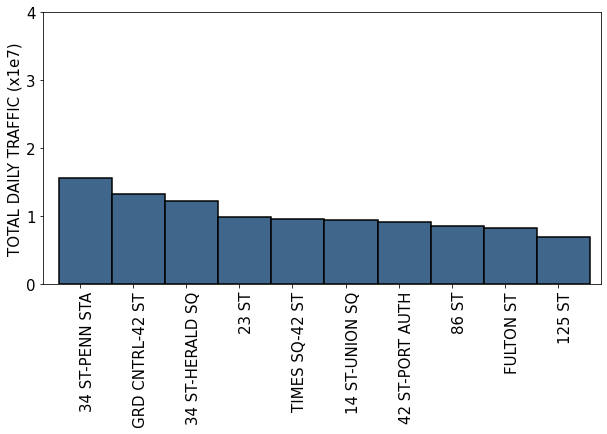

In [7]:
data_to_plot = top_stations[["STATION", "DAILY_TRAFFIC"]][:10]
data_to_plot["DAILY_TRAFFIC"] = data_to_plot["DAILY_TRAFFIC"]/1e7

y_label = "TOTAL DAILY TRAFFIC (x1e7)"
fontsize= 15
x_rot_ticklabel = 90
x_lim=(-0.7, 9.8)

plt.subplots(figsize=(10,5))

handle = sns.barplot(x = 'STATION',y='DAILY_TRAFFIC',
                     data=data_to_plot, 
                     color=(0.2, 0.4, 0.6, 0.6),
                     edgecolor=(0,0,0),
                     linewidth=1.5)

plt.yticks(np.arange(0, 5))

set_axis(handle,
         y_label=y_label, 
         fontsize=fontsize, 
         rot_xticklabels=x_rot_ticklabel,
         x_lim=x_lim)

plt.savefig("../figures/total_daily_traffic_for_top_10_stations.svg")

In [8]:
# """
# Define functions for the section below
# """
# # put boolean values in a matrix
# def sort_by_day_name(t):
#     """
#     Function to sort a data frame by day name
#     """
#     cat_day_of_week = CategoricalDtype(
#             ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
#             ordered=True
#         )

#     t['DAY_NAME2'] = t.index.astype(cat_day_of_week)
#     t = t.sort_values(['DAY_NAME2'])
#     t['DAY_NAME2'] = t.index
#     return t

# def generate_mask_for_top_stations(top_stations_name, df_daily):
#     """
#     Function to generate mask for top_sta tions based on statin name
#     """
#     mask2 = np.zeros((len(df_daily["STATION"]), len(top_stations)))
#     for i in range(0, len(top_stations_name)):    
#         mask = (df_daily["STATION"] == top_stations_name[i]).to_numpy()
#         mask2[:,i] = mask
#     mask = mask2.any(axis=1)
#     return mask

# def sort_by_station(top_stations_name, df):
#     """
#     Function to sort the data frame by station name
#     """
#     cat_station = CategoricalDtype(
#         top_stations_name,
#         ordered=True
#     )
    
#     df['STATION'] = df['STATION'].astype(cat_station)
#     df = df.sort_values(['STATION'])
#     return df

# def calculate_daily_traffic_ampm(df_ampm):
#     """
#     Function to calculate daily traffic with am/mp time separated, 
#     which is different from "calculate_total_daily_traffic" above
#     """
    
#     df_daily2 = (df_ampm
#                  .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", 'DAY_NAME',"AMPM"], as_index=False)
#                  .TMP_ENTRIES
#                  .min())
#     df_daily2.rename(columns={"TMP_ENTRIES": "DAILY_ENTRIES"}, inplace=True)
#     t = df_ampm.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE", 'DAY_NAME', "AMPM"], as_index=False).TMP_EXITS.min()
#     df_daily2
#     df_daily2['DAILY_EXITS'] = t.TMP_EXITS
#     df_daily2["DAILY_TRAFFIC"] = df_daily2.DAILY_ENTRIES + df_daily2.DAILY_EXITS
#     df_daily2 = df_daily2.groupby(["STATION","DATE","DAY_NAME","AMPM"],as_index=False).sum()
    
#     return df_daily2

# def calculate_weekly_traffic_ampm_for_top_stations(df_daily2, top_stations_name):
    
#     mask = (df_daily2["DAY_NAME"] == "Sunday") | (df_daily2["DAY_NAME"] == "Saturday")
#     df_weekends = df_daily2[mask]
#     df_weekdays = df_daily2[~mask]

#     # get weekday AMPM data
#     mask = generate_mask_for_top_stations(top_stations_name, df_weekdays)
#     # average for each station
#     t_wkd = (df_weekdays[mask]
#              .groupby(["STATION","AMPM"],as_index=False)
#              .mean())
#     t_wkd = t_wkd.drop(["DAILY_ENTRIES", "DAILY_EXITS"],axis=1)

#     t_wkd_am = t_wkd[t_wkd["AMPM"] == "AM"]
#     t_wkd_am = sort_by_station(top_stations_name, t_wkd_am)

#     t_wkd_pm = t_wkd[t_wkd["AMPM"] == "PM"]
#     t_wkd_pm = sort_by_station(top_stations_name, t_wkd_pm)

#     # now, generate weekend AMPM data
#     mask = generate_mask_for_top_stations(top_stations_name, df_weekends)
#     # average for each station
#     t_wke = (df_weekends[mask]
#              .groupby(["STATION","AMPM"],as_index=False)
#              .mean())
#     t_wke = t_wke.drop(["DAILY_ENTRIES", "DAILY_EXITS"],axis=1)

#     t_wke_am = t_wke[t_wke["AMPM"] == "AM"]
#     t_wke_am = sort_by_station(top_stations_name, t_wke_am)

#     t_wke_pm = t_wke[t_wke["AMPM"] == "PM"]
#     t_wke_pm = sort_by_station(top_stations_name, t_wke_pm)
    
#     return t_wkd_am, t_wkd_pm, t_wke_am, t_wke_pm

### Here we calculated average daily traffic across all the top 10 most trafficked stations over the entire  selected period

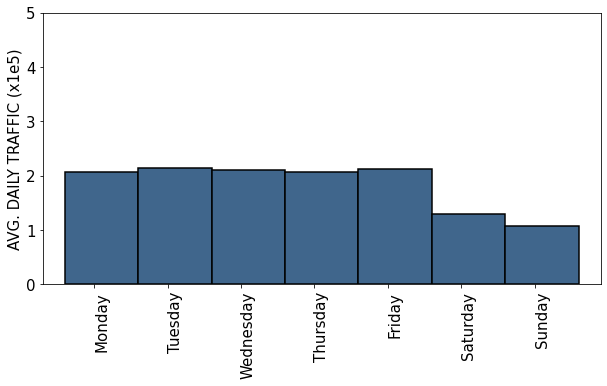

In [9]:
# calculate daily traffic based on daily entries and daily exits (not total here) 

# t = df_daily2.groupby(["dayname"])
df_daily
mask = generate_mask_for_top_stations(top_stations, top_stations_name, df_daily)
t = df_daily[mask].groupby(["DAY_NAME"]).mean() 
t = sort_by_day_name(t)
data_to_plot = t[["DAY_NAME2", "DAILY_TRAFFIC"]]
data_to_plot["DAILY_TRAFFIC"] = data_to_plot["DAILY_TRAFFIC"]/1e5

y_label = "AVG. DAILY TRAFFIC (x1e5)"
fontsize = 15
x_rot_ticklabel = 90
x_lim = (-0.7, 6.9)
# y_ticks = np.arange(0, 6)

plt.subplots(figsize=(10,5))

handle = sns.barplot(x = 'DAY_NAME2',y='DAILY_TRAFFIC',
                     data=data_to_plot, 
                     color=(0.2, 0.4, 0.6, 0.6),
                     edgecolor=(0,0,0),
                     linewidth=1.5)

plt.yticks(np.arange(0, 6))

set_axis(handle,
         y_label=y_label, 
         fontsize=fontsize, 
         rot_xticklabels=x_rot_ticklabel,
         x_lim=x_lim,
         horizontal_alignment="left",
         )

plt.savefig("../figures/avg_daily_traffic_overall.svg")

### Here we calculated daily average traffic across all the top 10 stations over the entire selected period

In [10]:
df_daily2 = calculate_daily_traffic_ampm(df_ampm)
df_daily2

,STATION,DATE,DAY_NAME,AMPM,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
0,1 AV,11/02/2019,Saturday,PM,5003.0,5976.0,10979.0
1,1 AV,11/03/2019,Sunday,AM,3431.0,3514.0,6945.0
2,1 AV,11/03/2019,Sunday,PM,4360.0,5252.0,9612.0
3,1 AV,11/04/2019,Monday,AM,5736.0,7914.0,13650.0
4,1 AV,11/04/2019,Monday,PM,12731.0,12348.0,25079.0
...,...,...,...,...,...,...,...
41853,ZEREGA AV,12/25/2019,Wednesday,PM,598.0,528.0,1126.0
41854,ZEREGA AV,12/26/2019,Thursday,AM,596.0,435.0,1031.0
41855,ZEREGA AV,12/26/2019,Thursday,PM,1433.0,1355.0,2788.0
41856,ZEREGA AV,12/27/2019,Friday,AM,649.0,606.0,1255.0


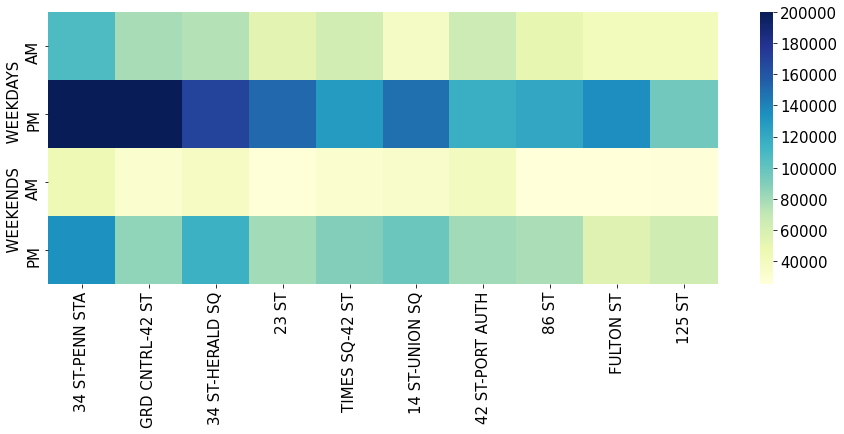

In [11]:
t_wkd_am, t_wkd_pm, t_wke_am, t_wke_pm = calculate_weekly_traffic_ampm_for_top_stations(top_stations, top_stations_name, df_daily2)

data_to_plot = np.zeros((4, len(top_stations_name)))
data_to_plot[0,:] = t_wkd_am["DAILY_TRAFFIC"].to_numpy()
data_to_plot[1,:] = t_wkd_pm["DAILY_TRAFFIC"].to_numpy()
data_to_plot[2,:] = t_wke_am["DAILY_TRAFFIC"].to_numpy()
data_to_plot[3,:] = t_wke_pm["DAILY_TRAFFIC"].to_numpy()

xticklabels = top_stations_name
yticklabels = ["AM", "PM","AM", "PM"]
y_label = "  WEEKENDS     WEEKDAYS     "
fontsize= 15
x_rot_ticklabel = 90

plt.subplots(figsize=(15,5))

handle = sns.heatmap(data_to_plot,cmap= "YlGnBu",
                annot=False,
                xticklabels=xticklabels, 
                yticklabels=yticklabels,
                vmin=2.5e4, vmax=0.2e6);

set_axis(handle,
         y_label=y_label, 
         fontsize=fontsize, 
         rot_xticklabels=x_rot_ticklabel,
         horizontal_alignment='center'
        )
cbar = handle.collections[0].colorbar
# cbar.set_ticks(list(range(100000, 350000, 50000)))
cbar.ax.tick_params(labelsize=fontsize)
plt.savefig("../figures/weekly_ampm_average_traffic.svg")
